# Example ICA components from individual subjects obtained following dual regression

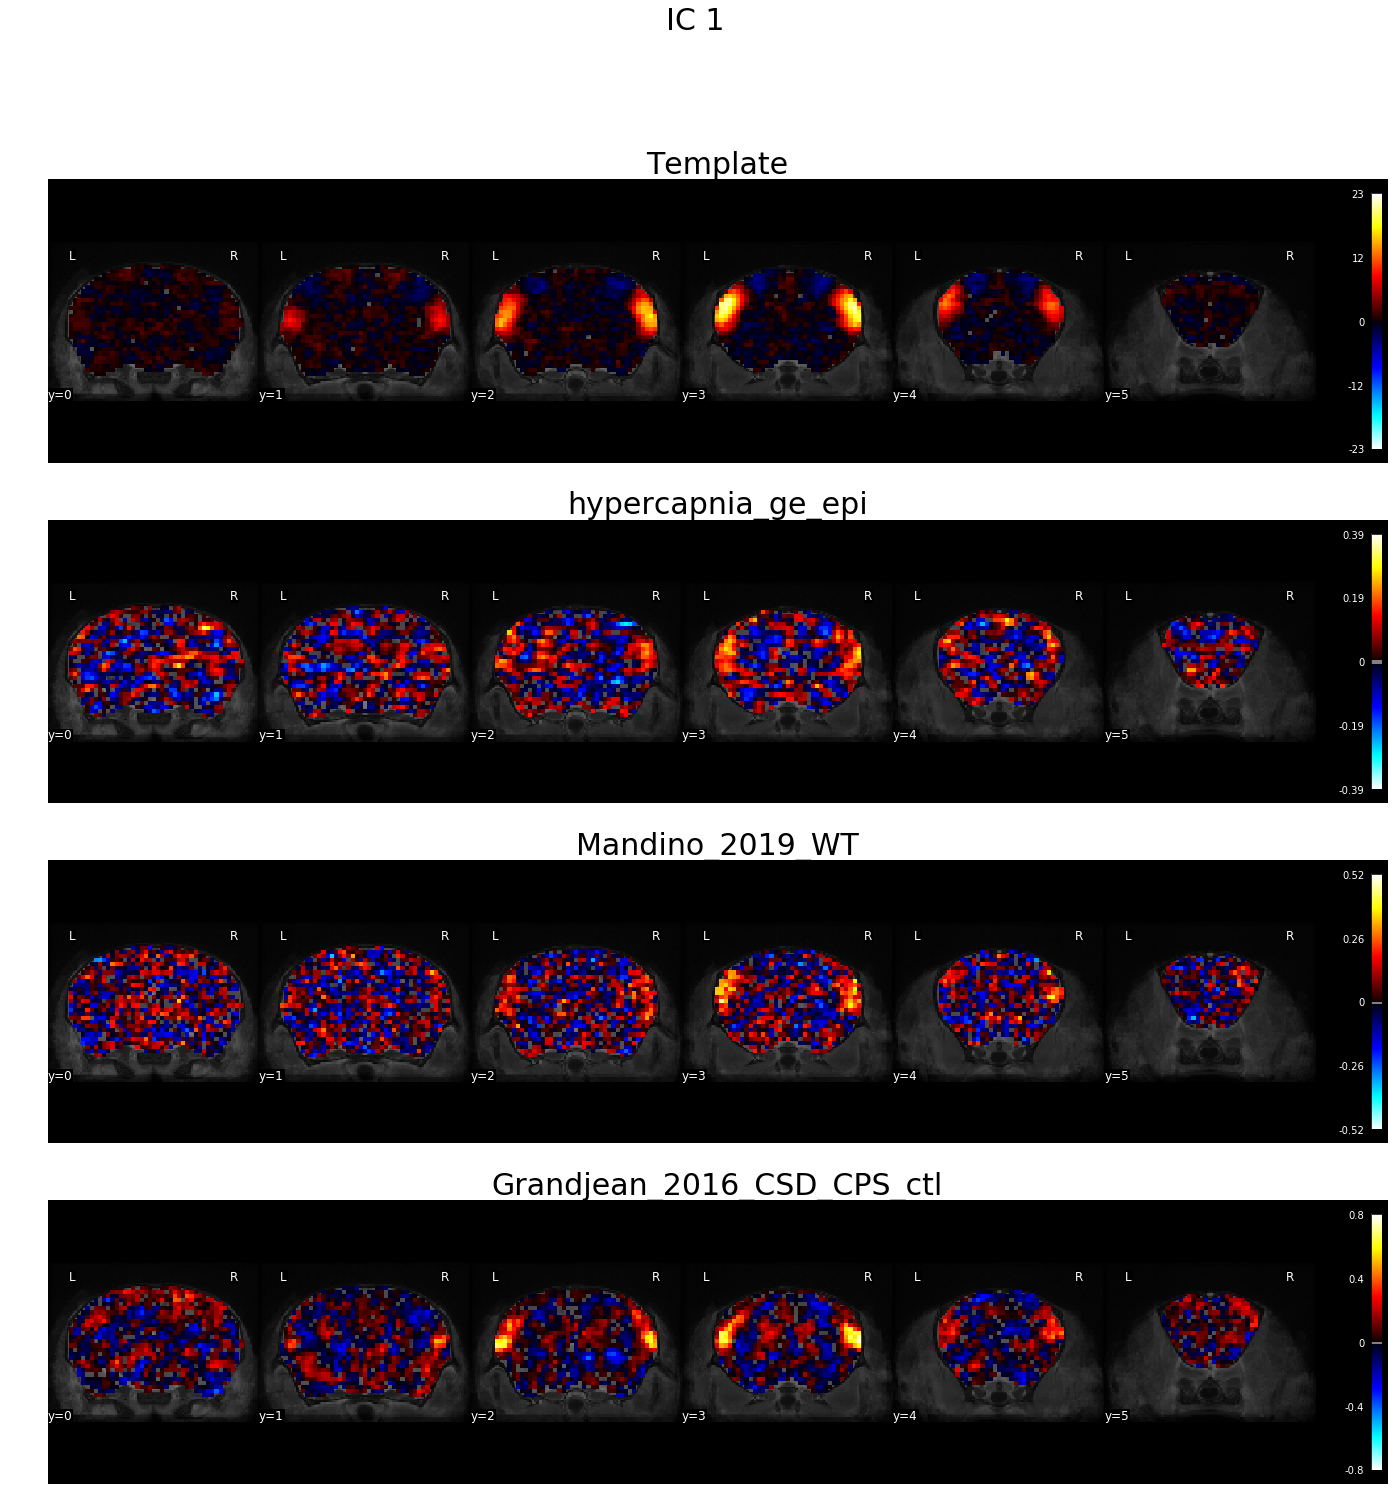

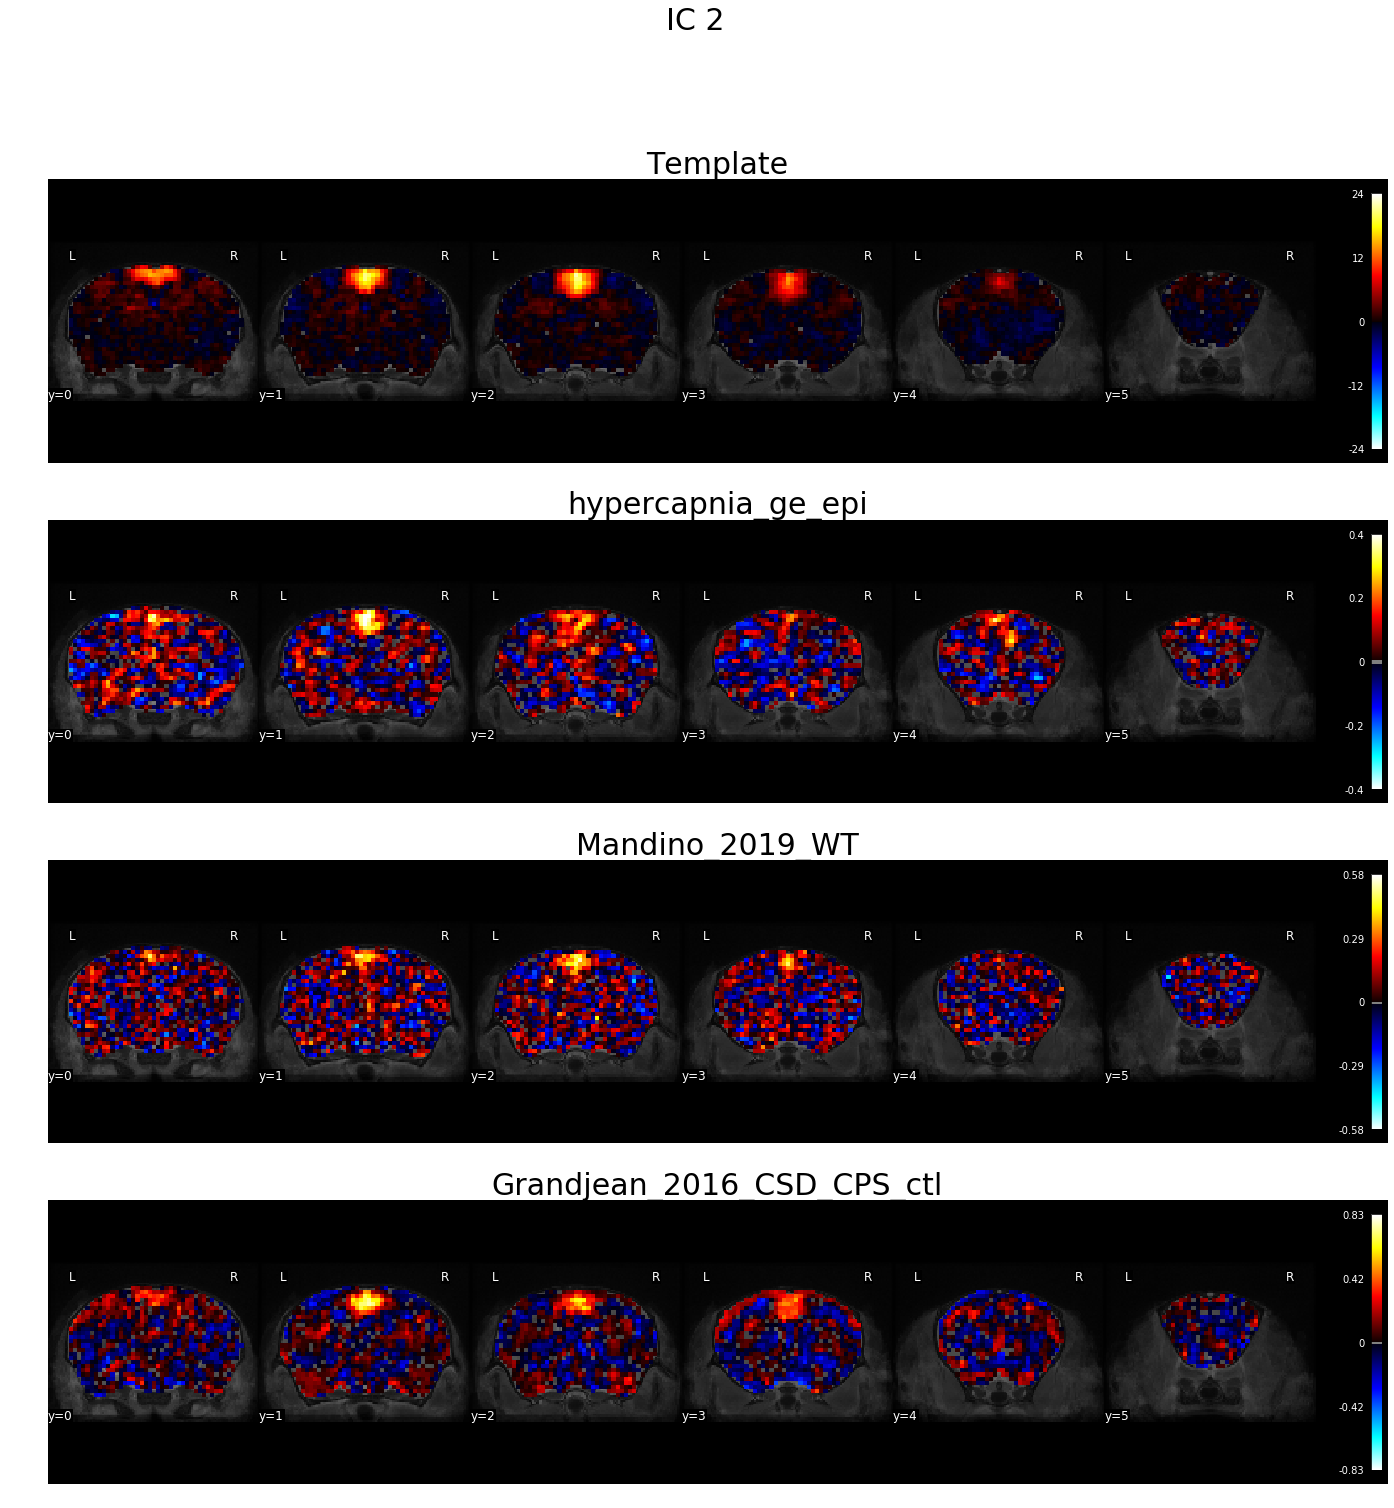

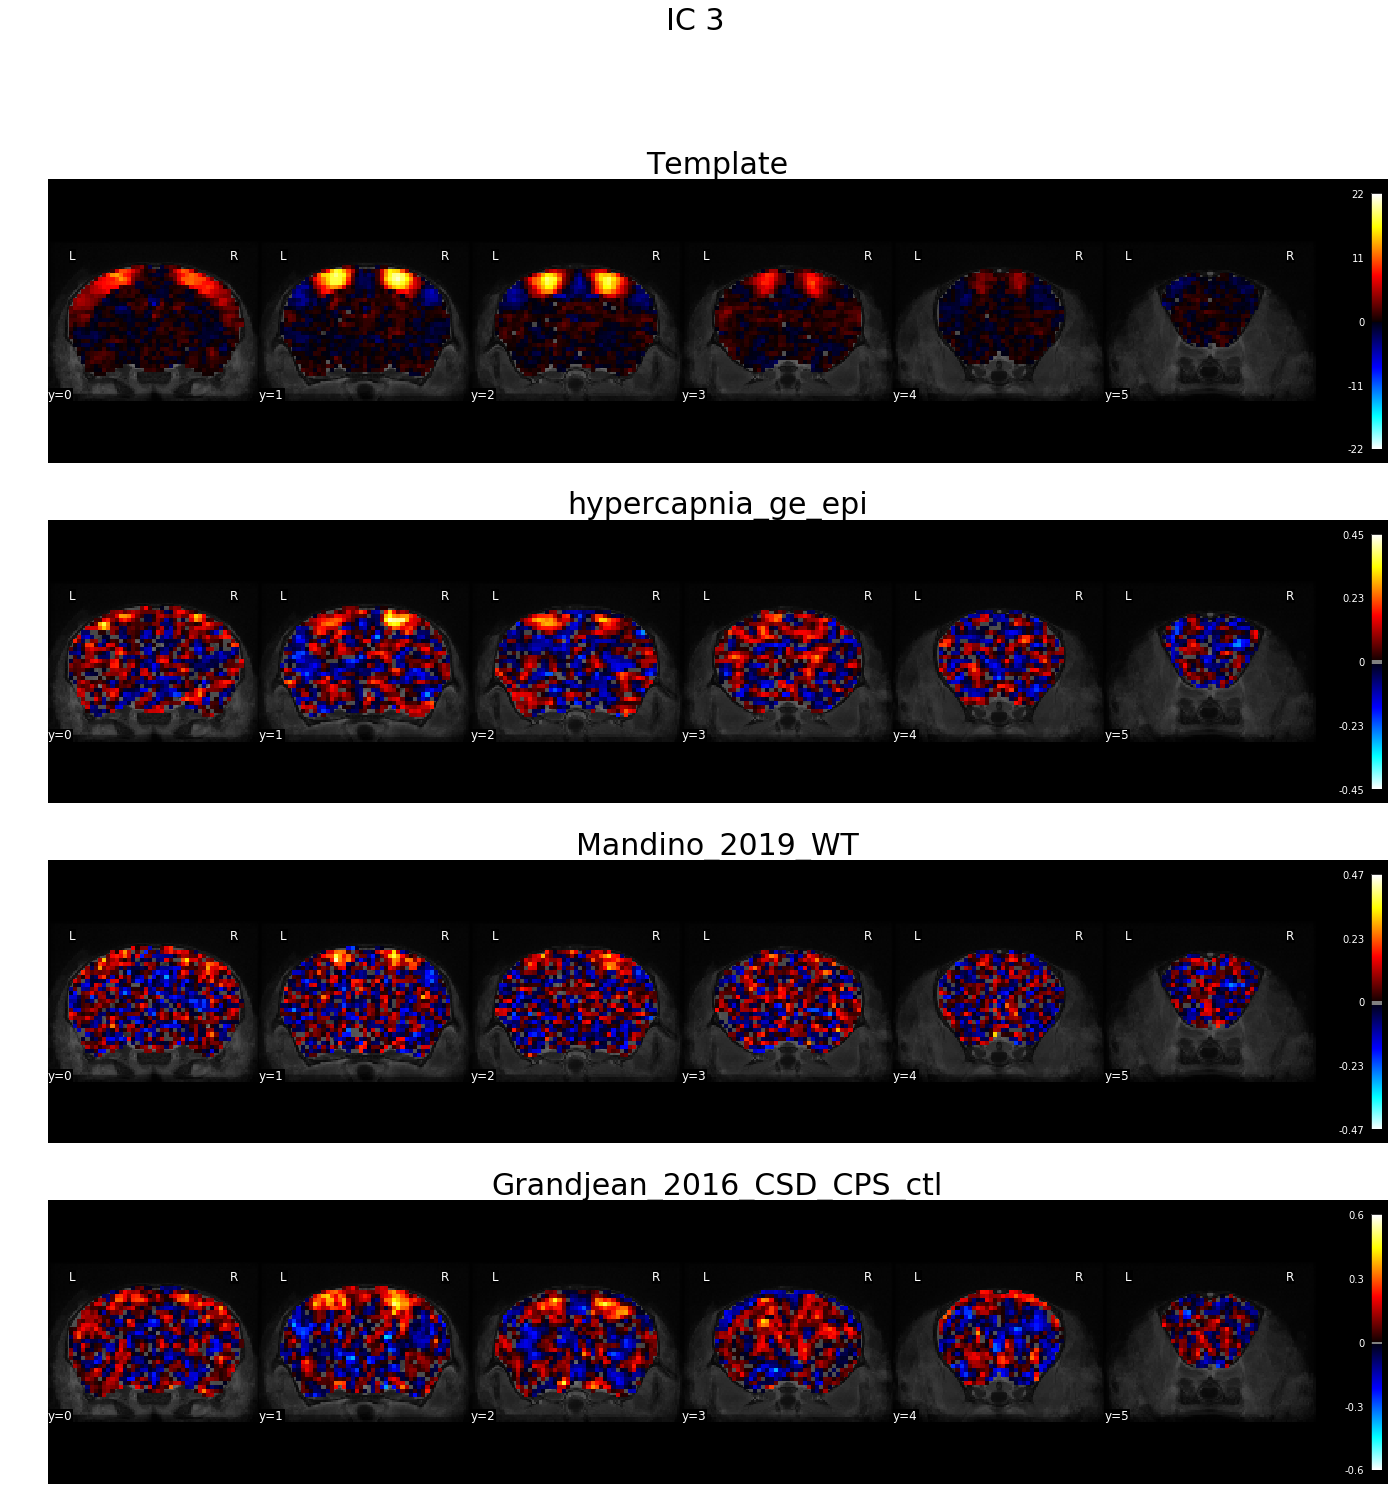

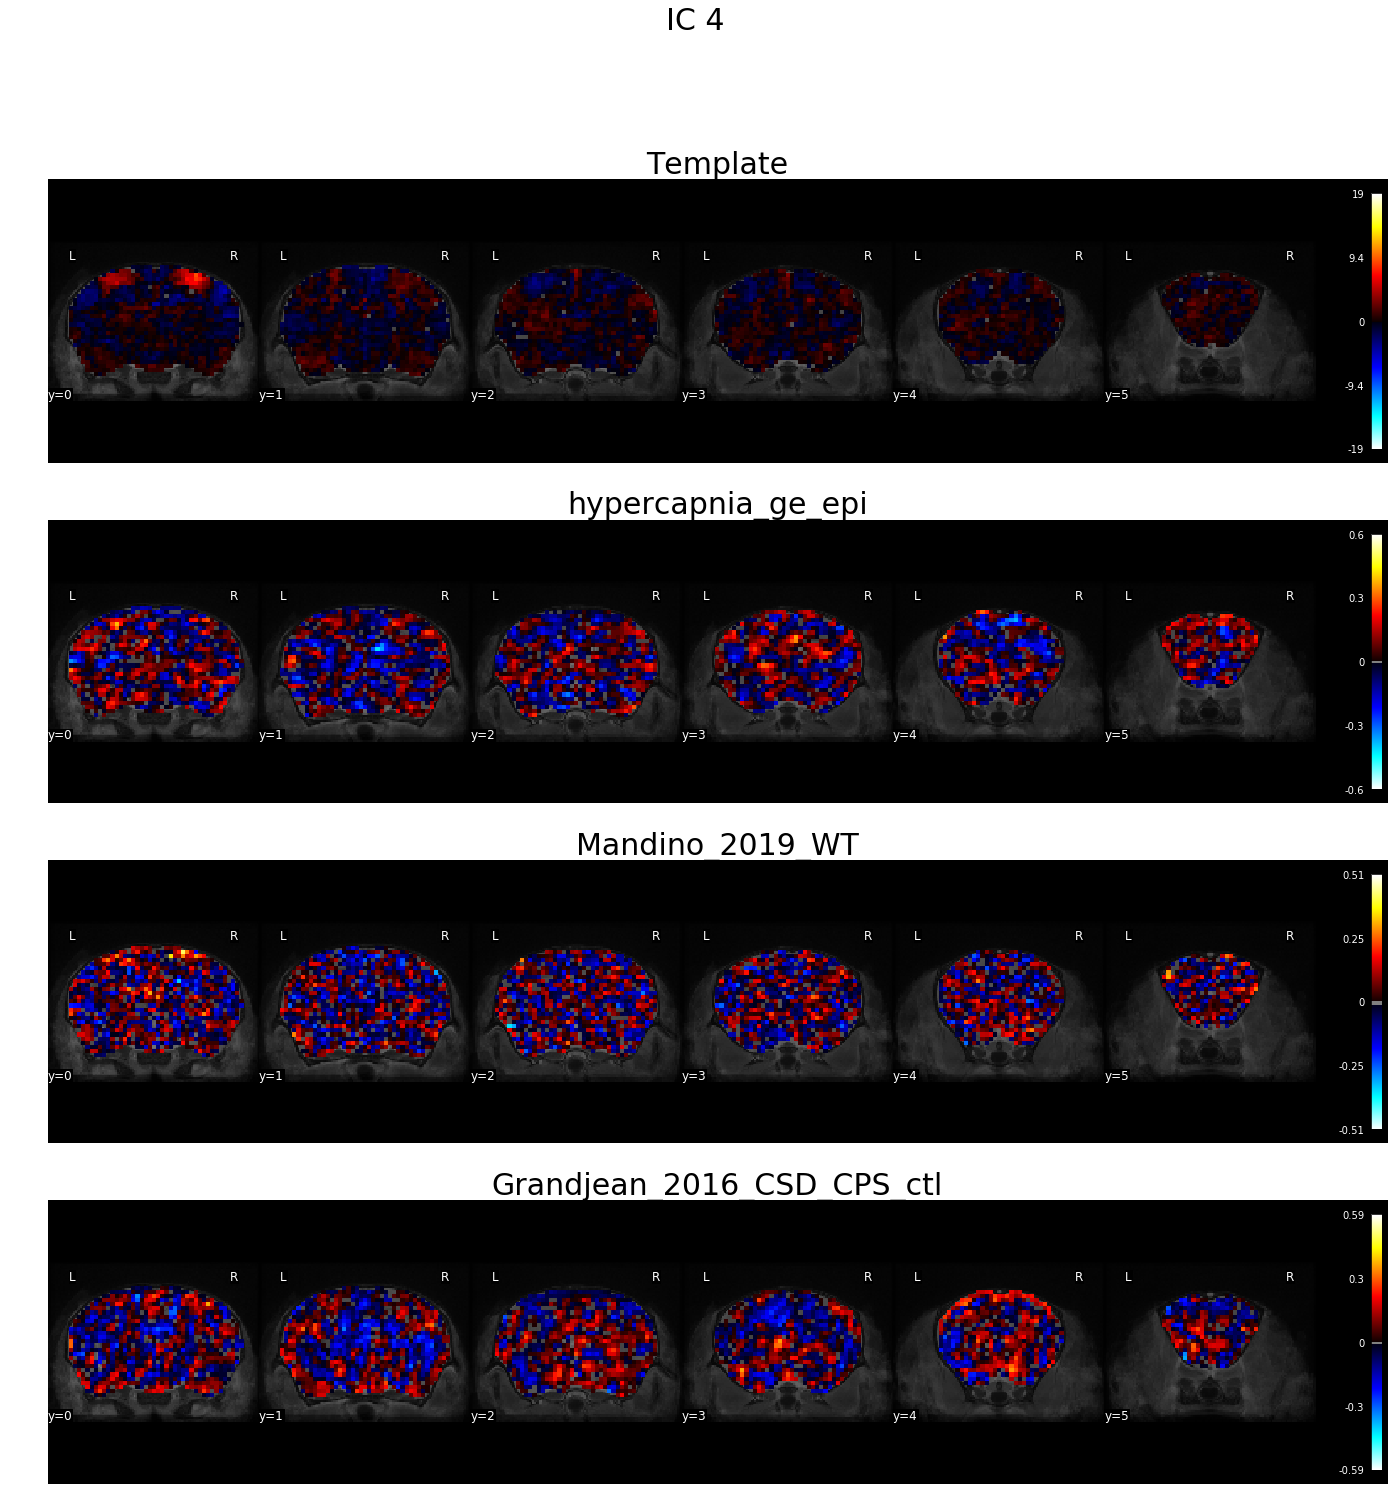

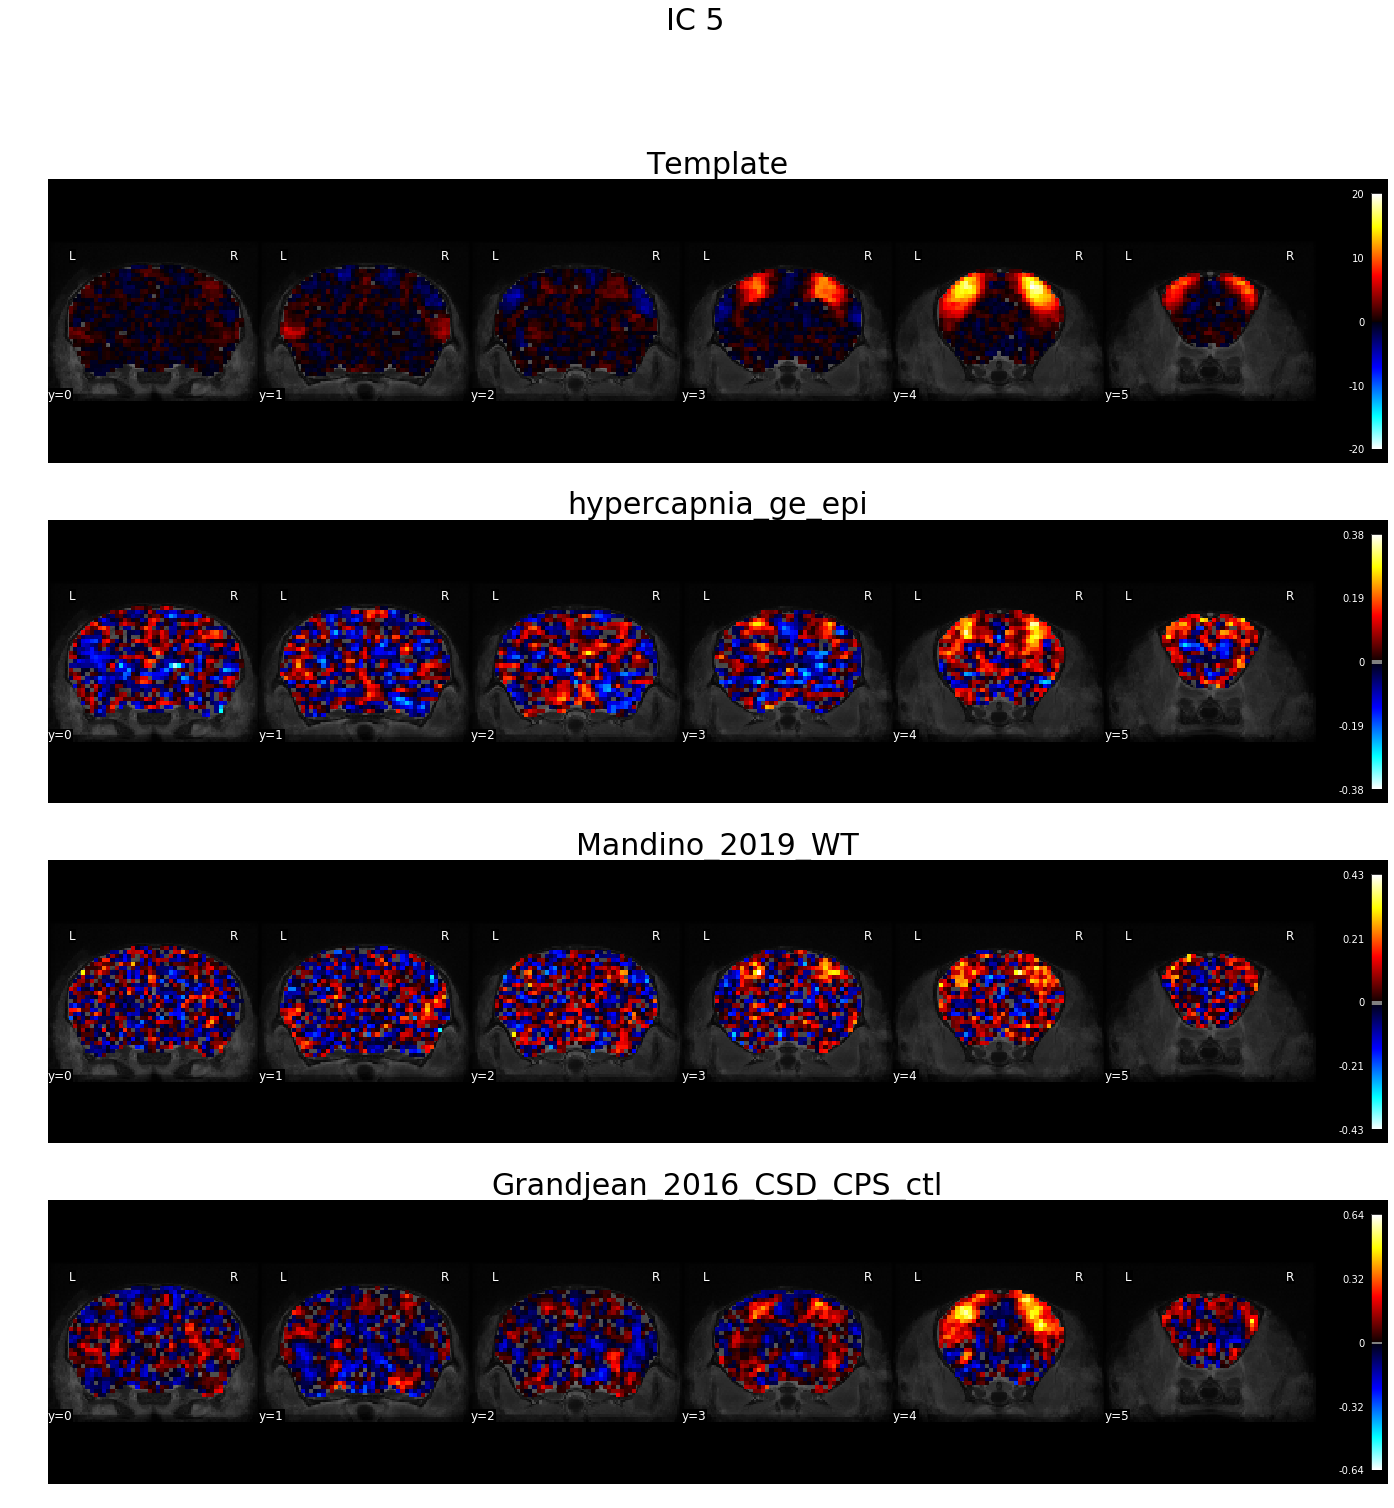

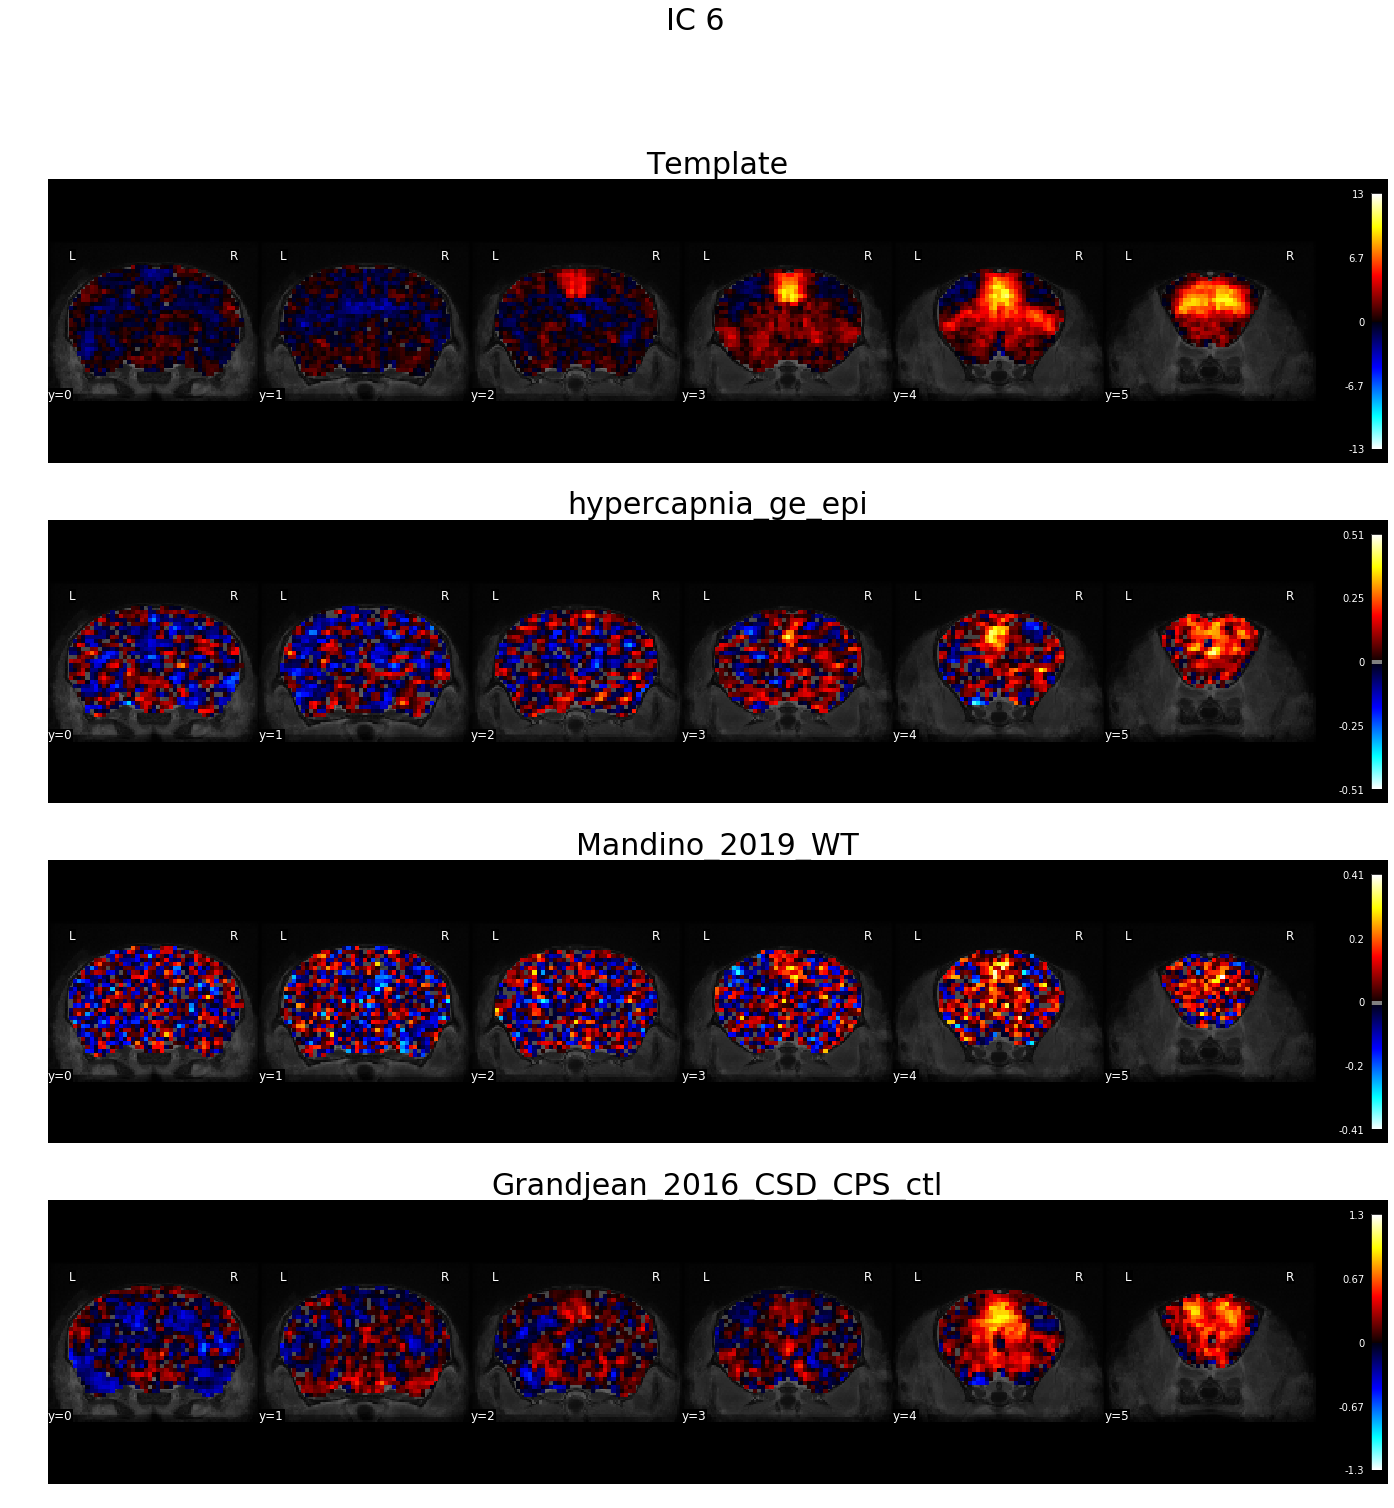

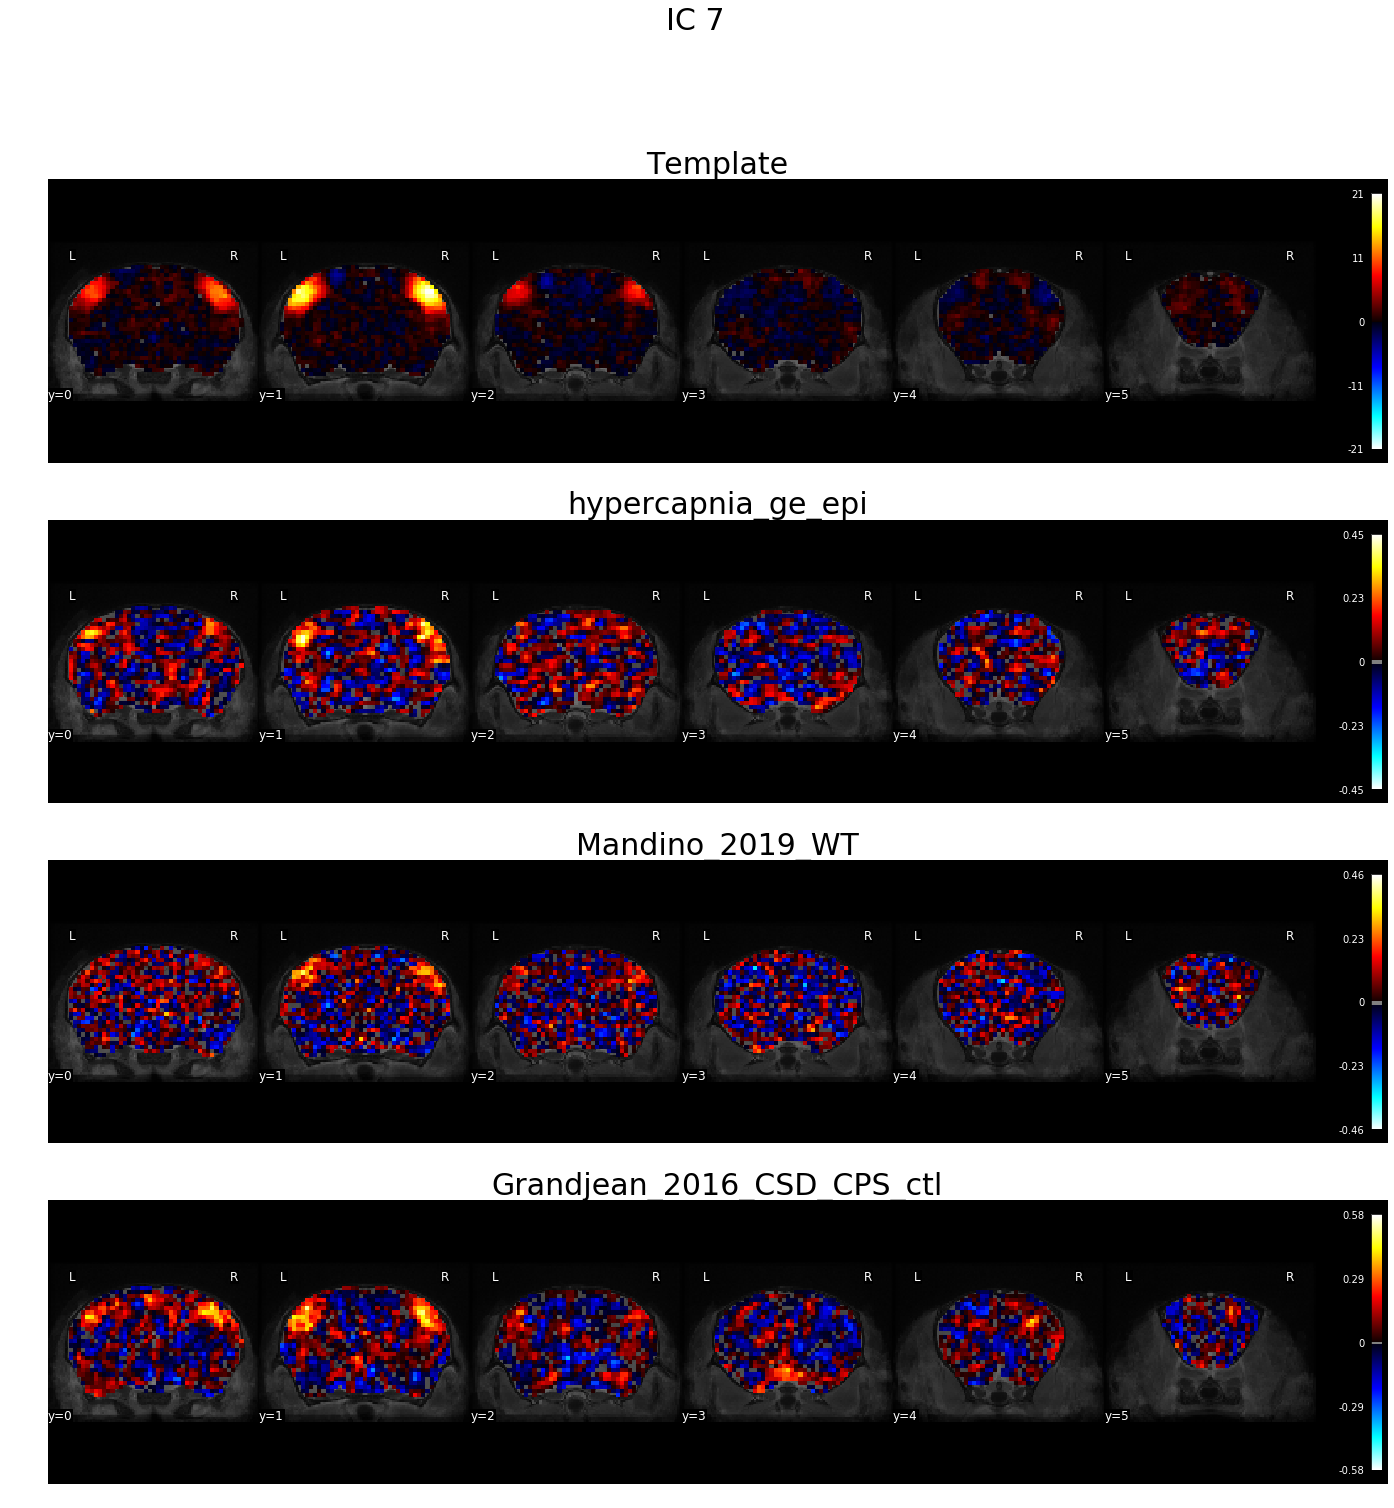

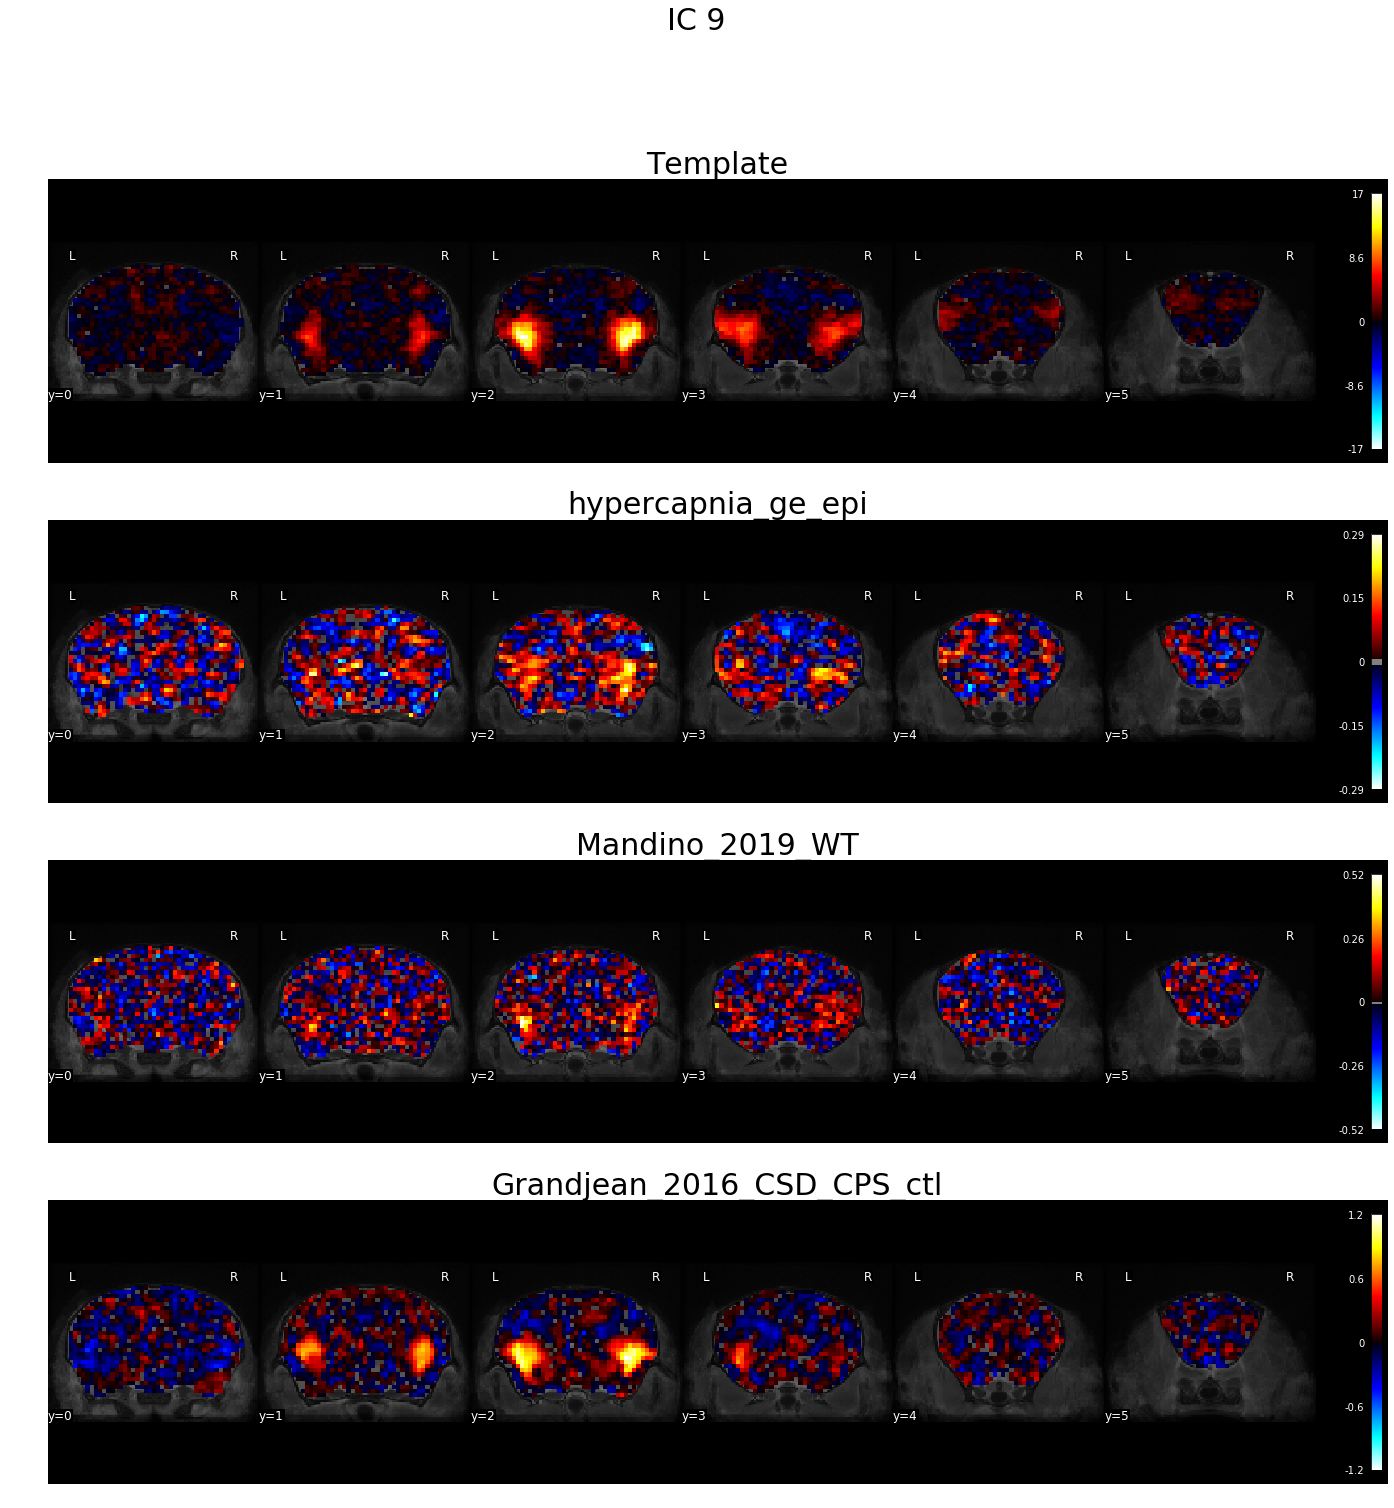

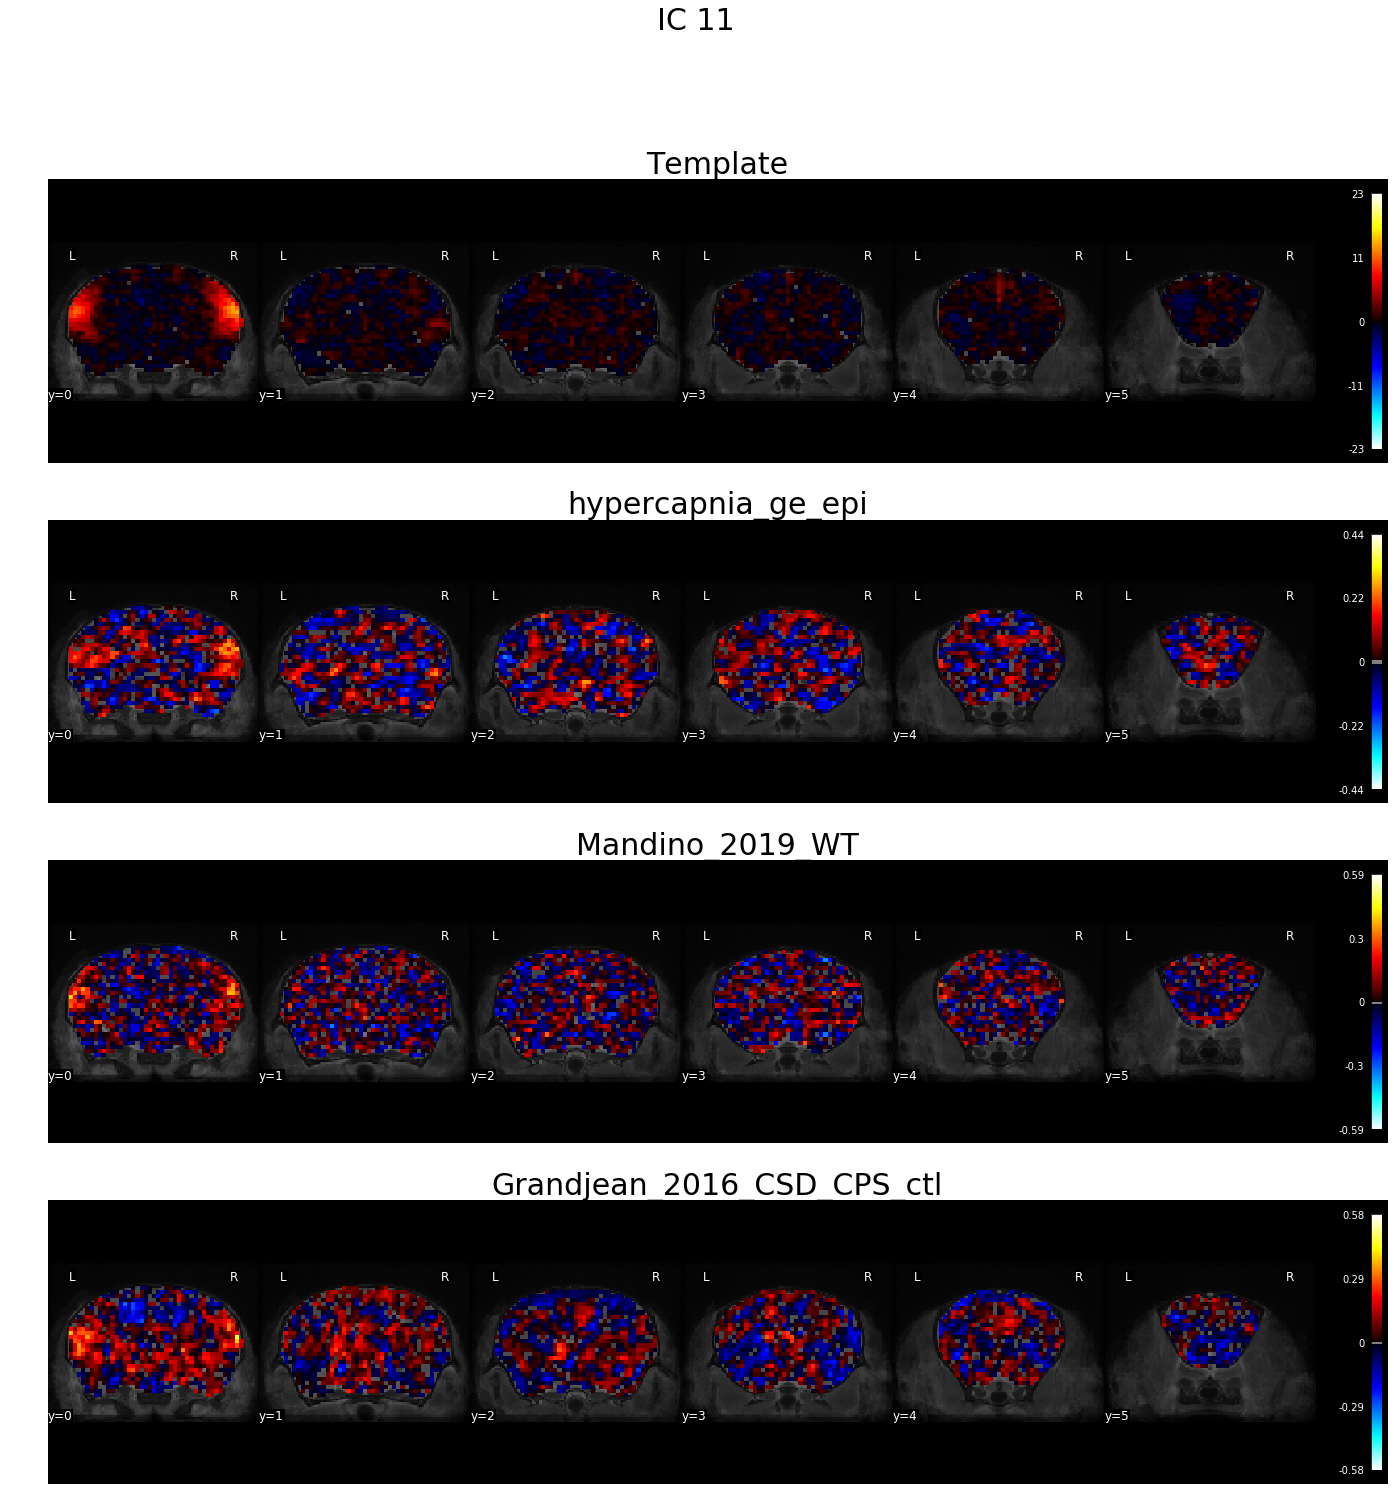

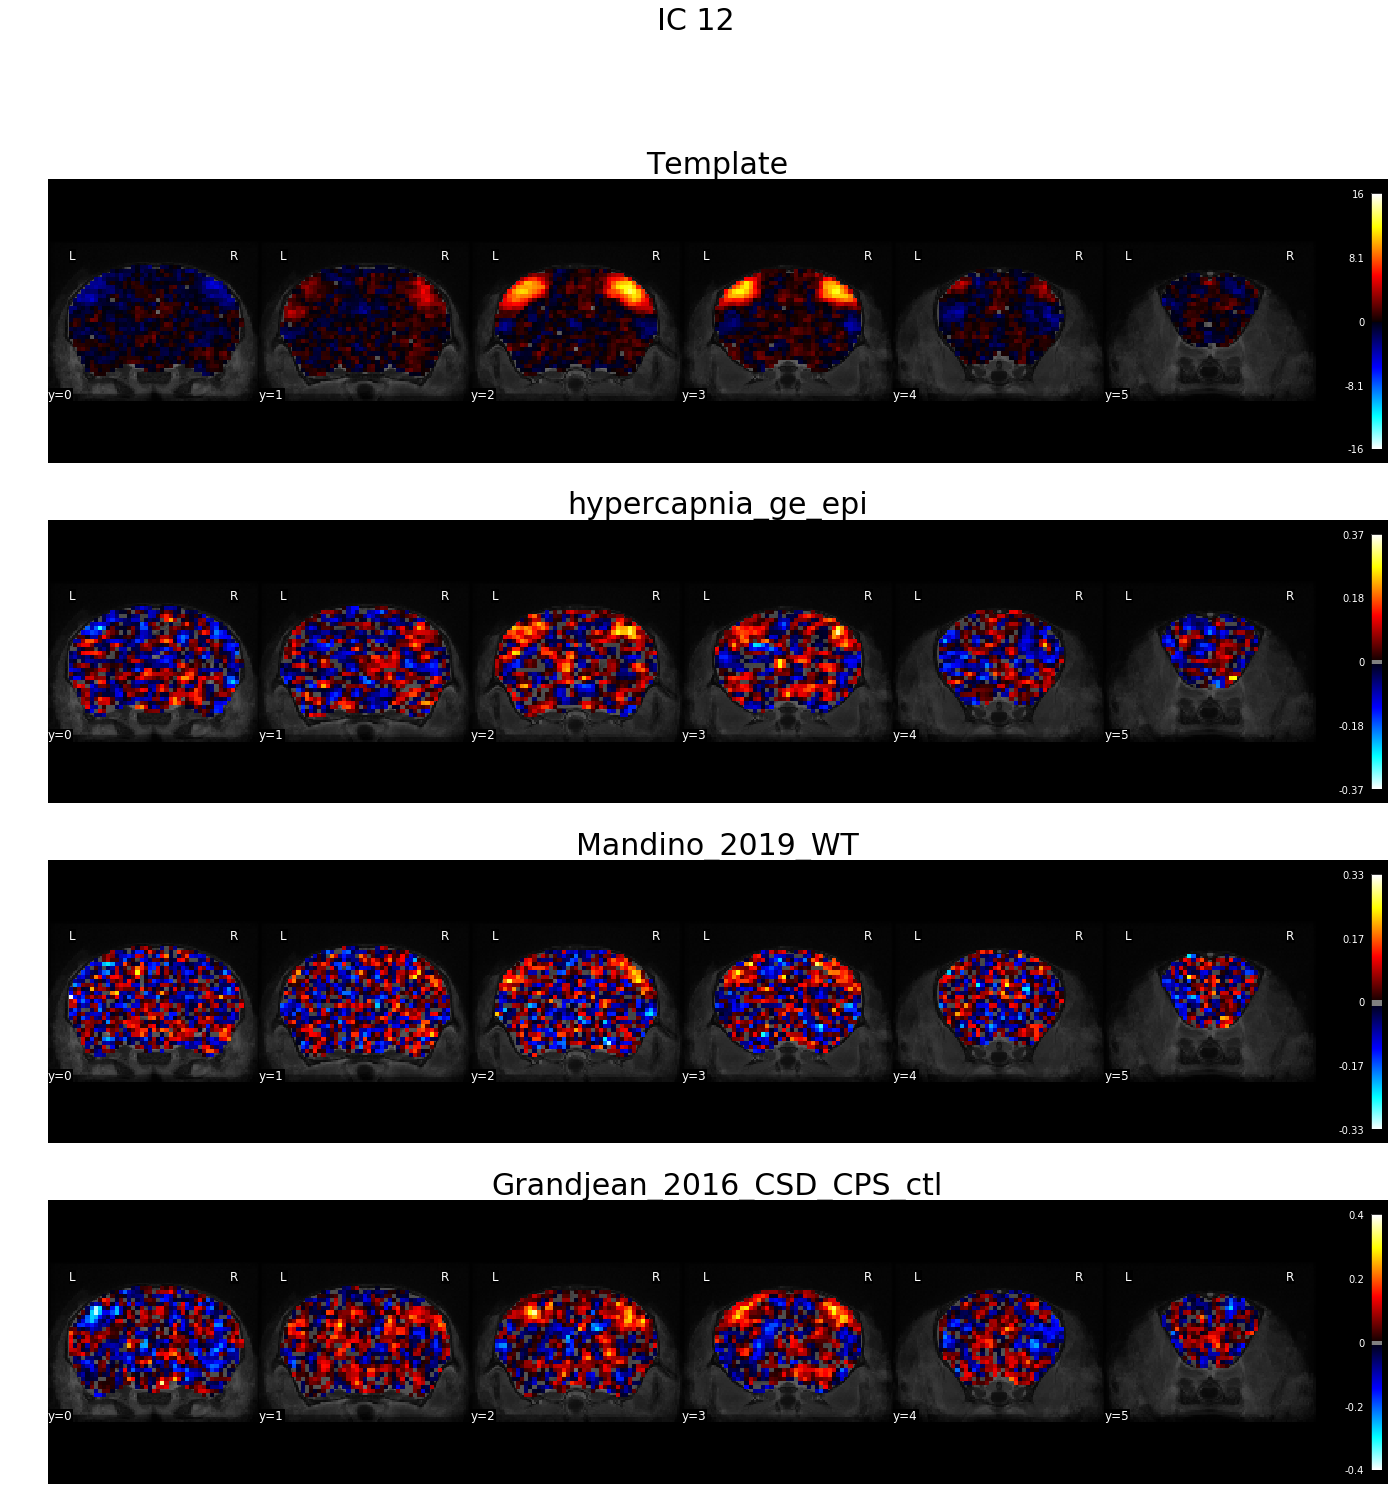

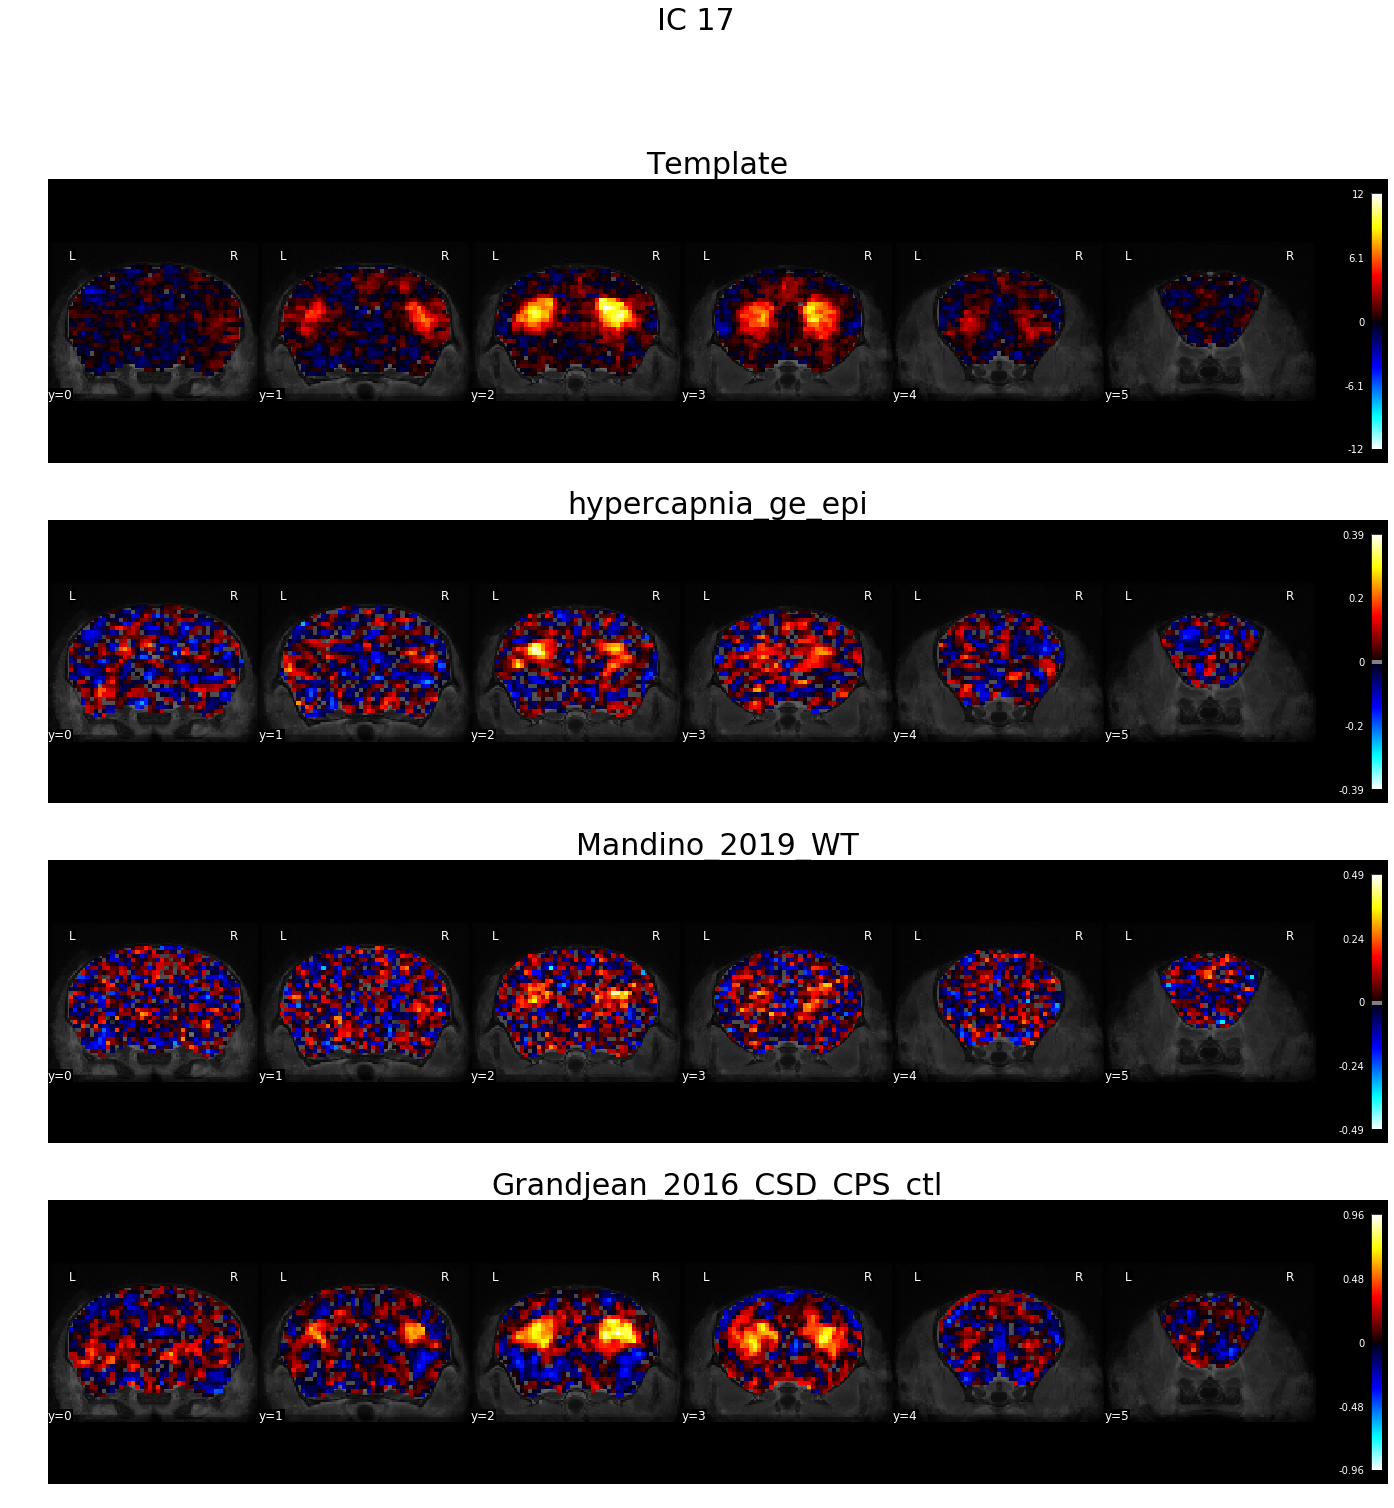

In [6]:
%matplotlib inline
from nilearn.plotting import plot_stat_map
groups=metadata['groups']
mask_file=metadata['mask_file']

brain_mask=np.asarray(nb.load(mask_file).dataobj)
volume_indices=brain_mask.astype(bool)

IC_file='Mandino_2019_3xTg_rabies_out/group_melodic.ica/melodic_IC.nii.gz'
IC_list=np.asarray(pd.read_csv('Mandino_2019_3xTg_rabies_out/IC_list.csv',header=None))[0]-1

all_IC_array=np.asarray(nb.load(IC_file).dataobj)
all_IC_vectors=np.zeros([all_IC_array.shape[3],volume_indices.sum()])
for i in range(all_IC_array.shape[3]):
    all_IC_vectors[i,:]=(all_IC_array[:,:,:,i])[volume_indices]


for IC in IC_list:
    fig,axes = plt.subplots(nrows=4, ncols=1,figsize=(24,6*4))
    fig.suptitle('IC %s' % (str(IC+1)), fontsize=30)
    
    ax=axes[0]
    plot_stat_map(analysis_functions.recover_3D(mask_file, all_IC_vectors[IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('Template', fontsize=30)

    for group,ax in zip(group_subs.keys(),axes[1:]):
        for sub in group_subs[group]:
            sub_ICs=all_sub_ICs[sub]
        plot_stat_map(analysis_functions.recover_3D(mask_file, sub_ICs[IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
        ax.set_title('%s' % (group), fontsize=30)

